# Работа с базами данных

Материалы:
* Макрушин С.В. Лекция 6: Работа с базами данных
* https://sqliteonline.com/
* https://docs.python.org/3/library/sqlite3.html
* https://www.geeksforgeeks.org/sql-join-set-1-inner-left-right-and-full-joins/
* https://www.datacamp.com/community/tutorials/group-by-having-clause-sql

## Задачи для совместного разбора

1. Работая с базой данных `Chinook_Sqlite.sqlite`, найдите и выведите на экран имена и фамилии всех заказчиков из Канады

2. Найти и вывести на экран названия всех альбомов группы Accept

3. Создайте базу данных с названием вашей группы. В этой базе данных создайте таблицу Student, содержащую 2 столбца: id и name. Добавьте в таблицу Student информацию о студентах, сидящих с вами по соседству.

## Лабораторная работа 6

1. Создайте файл базы данных c названием `recipes.db`. Создайте объект-курсор. 

In [1]:
import sqlite3
# создаем оператор соединения для соединения с нашей базой данных
base = sqlite3.connect('recipes.db'); base

In [2]:
cursor = base.cursor()

In [3]:
type(cursor)

sqlite3.Cursor

2. Напишите и выполните SQL-запрос для создания таблицы рецептов `Recipe`. Таблица должна содержать следующие поля:
`id`, `name`, `minutes`, `submitted`, `description`, `n_ingredients`. Определитесь с типами и составом ключевых полей.

In [3]:
cursor.execute("CREATE TABLE Recipe(name text, id integer PRIMARY KEY, minutes integer, submitted object, description text, n_ingredients integer)")

In [4]:
base.commit(); base

In [5]:
# файл успешно создан

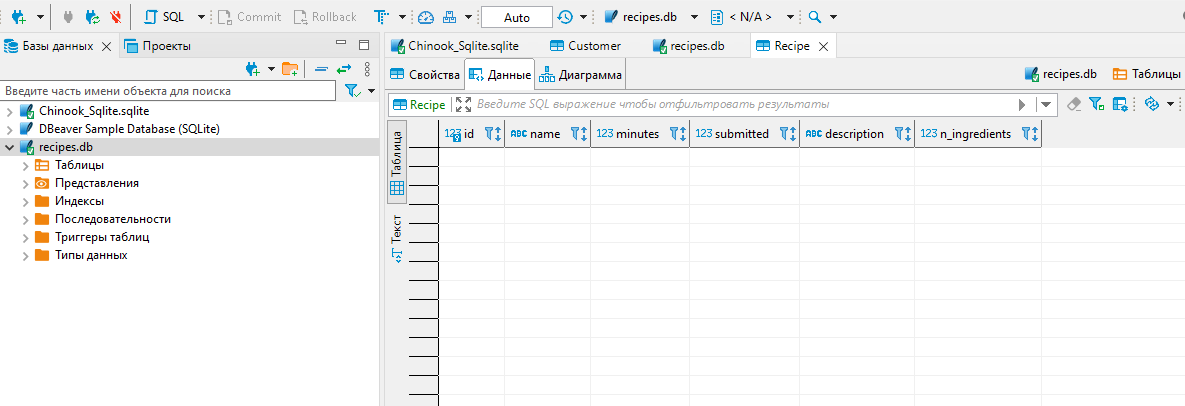

3. Напишите и выполните SQL-запрос для создания таблицы отзывов `Review`. Таблица должна содержать следующие поля:
`id`, `user_id`, `recipe_id`, `date`, `rating`, `review`. Определитесь с типами полей, набором ключевых полей. При помощи внешнего ключа соедините две таблицы.

In [6]:
base1 = sqlite3.connect('Review.db')
cursor1 = base1.cursor()
cursor1.execute("CREATE TABLE Review(id integer  PRIMARY KEY, user_id integer, recipe_id integer, date str, rating integer, review str, FOREIGN KEY (recipe_id)  REFERENCES Recipe(id))")
base1.commit()

In [ ]:
# сначала устанавливается соединение с помощью connect(), а затем создается объект курсора с использованием объекта соединения
# курсор нужен для выполнения операторов SQLite

4. Загрузите данные из файлов `reviews_sample.csv` (__ЛР2__) и `recipes_sample_with_tags_ingredients.csv` (__ЛР5__) в созданные таблицы

In [7]:
import pandas as pd

In [8]:
rs = pd.read_csv('reviews_sample.csv')
rsw = pd.read_csv('recipes_sample_with_tags_ingredients.csv')

In [9]:
rs.rename(columns={'Unnamed: 0': 'id'}, inplace=True)

In [10]:
rs

,id,user_id,recipe_id,date,rating,review
0,370476,21752,57993,2003-05-01,5,Last week whole sides of frozen salmon fillet ...
1,624300,431813,142201,2007-09-16,5,So simple and so tasty! I used a yellow capsi...
2,187037,400708,252013,2008-01-10,4,"Very nice breakfast HH, easy to make and yummy..."
3,706134,2001852463,404716,2017-12-11,5,These are a favorite for the holidays and so e...
4,312179,95810,129396,2008-03-14,5,Excellent soup! The tomato flavor is just gre...
...,...,...,...,...,...,...
126691,1013457,1270706,335534,2009-05-17,4,This recipe was great! I made it last night. I...
126692,158736,2282344,8701,2012-06-03,0,This recipe is outstanding. I followed the rec...
126693,1059834,689540,222001,2008-04-08,5,"Well, we were not a crowd but it was a fabulou..."
126694,453285,2000242659,354979,2015-06-02,5,I have been a steak eater and dedicated BBQ gr...


In [11]:
np.unique(rs['id'], return_counts = True)

NameError: name 'np' is not defined

In [27]:
rsw

,Unnamed: 0,Unnamed: 0.1,name,id,minutes,contributor_id,submitted,n_steps,description,n_ingredients,tags,n_tags,ingredient
0,0,0,george s at the cove black bean soup,44123,90,35193,2002-10-25,11,an original recipe created by chef scott meska...,18,weeknight; time-to-make; course; main-ingredie...,25,unsalted butter* carrot* onion* celery* brocco...
1,1,1,healthy for them yogurt popsicles,67664,10,91970,2003-07-26,3,my children and their friends ask for my homem...,3,15-minutes-or-less; time-to-make; course; prep...,31,milk* frozen juice concentrate* plain yogurt
2,2,2,i can t believe it s spinach,38798,30,1533,2002-08-29,5,"these were so go, it surprised even me.",8,30-minutes-or-less; time-to-make; course; main...,17,onion* frozen chopped spinach* eggs* garlic po...
3,3,3,italian gut busters,35173,45,22724,2002-07-27,7,my sister-in-law made these for us at a family...,9,60-minutes-or-less; time-to-make; course; prep...,11,sandwich bun* good seasonings italian salad dr...
4,4,4,love is in the air beef fondue sauces,84797,25,4470,2004-02-23,4,i think a fondue is a very romantic casual din...,12,30-minutes-or-less; time-to-make; course; main...,19,beef steaks* vegetable oil* spicy mustard* fre...
...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29995,29995,zurie s holey rustic olive and cheddar bread,267661,80,200862,2007-11-25,16,this is based on a french recipe but i changed...,10,time-to-make; course; main-ingredient; cuisine...,18,dry white wine* eggs* cheddar cheese* baking p...
29996,29996,29996,zwetschgenkuchen bavarian plum cake,386977,240,177443,2009-08-24,22,"this is a traditional fresh plum cake, thought...",11,time-to-make; course; main-ingredient; cuisine...,19,unsalted butter* milk* flour* salt* vanilla* a...
29997,29997,29997,zwiebelkuchen southwest german onion cake,103312,75,161745,2004-11-03,10,this is a traditional late summer early fall s...,13,time-to-make; course; main-ingredient; cuisine...,20,onion* milk* eggs* butter* flour* salt* pepper...
29998,29998,29998,zydeco soup,486161,60,227978,2012-08-29,7,this is a delicious soup that i originally fou...,22,ham; 60-minutes-or-less; time-to-make; course;...,20,onion* celery* dried thyme* dried oregano* fre...


In [28]:
np.unique(rsw['name'], return_counts = True)

NameError: name 'np' is not defined

In [29]:
type(rs['rating'][0])

numpy.int64

In [30]:
import numpy as np
sqlite3.register_adapter(np.int64, int)

In [31]:
np.unique(rs['recipe_id'], return_counts = True)

(array([    48,     55,     66, ..., 536728, 536729, 536747], dtype=int64),
 array([ 2,  4, 18, ...,  1,  4,  4], dtype=int64))

In [32]:
#регистрирует вызываемый объект для преобразования пользовательского типа
#Python в один из поддерживаемых типов SQLite

In [33]:
rs1 = [rs['id'], rs['user_id'], rs['recipe_id'], rs['date'], rs['rating'], rs['review']]

In [34]:
sql = '''
INSERT INTO Review(id, user_id, recipe_id, date, rating, review) 
VALUES (?, ?, ?, ?, ?, ?)
'''

In [35]:
rs2 = []
for j in range(len(rs1[0])):
    for i in rs1:
        rs2.append(i[j])
    cursor1.execute(sql, rs2)
    rs2 = []

In [36]:
rs1[0]

0          370476
1          624300
2          187037
3          706134
4          312179
           ...   
126691    1013457
126692     158736
126693    1059834
126694     453285
126695     691207
Name: id, Length: 126696, dtype: int64

In [37]:
sql1 = '''SELECT * FROM Review'''

In [38]:
cursor1.execute(sql1)

In [39]:
cursor1.fetchall()

[(5,
  52282,
  120345,
  '2005-05-21',
  4,
  "very very sweet. after i waited the 2 days i bought 2 more pints of raspberries and added them to the mix. i'm going to add some as a cake filling today and will take a photo."),
 (6,
  124416,
  120345,
  '2011-08-06',
  0,
  'Just an observation, so I will not rate.  I followed this procedure with strawberries instead of raspberries.  Perhaps this is the reason it did not work well.  Sorry to report that the strawberries I did in August were moldy in October.  They were stored in my downstairs fridge, which is very cold and infrequently opened.  Delicious and fresh-tasting prior to that, though.  So, keep a sharp eye on them.  Personally I would not keep them longer than a month.  This recipe also appears as #120345 posted in July 2009, which is when I tried it.  I also own the Edna Lewis cookbook in which this appears.'),
 (7,
  2000192946,
  120345,
  '2015-05-10',
  2,
  'This recipe was OVERLY too sweet.  I would start out with 1/3 

In [40]:
base1.commit()

In [41]:
# Метод commit() сохраняет все внесенные нами изменения
# Метод fetchall() можно использовать для получения всех результатов

In [42]:
rsw = rsw.drop(["Unnamed: 0", "Unnamed: 0.1", "contributor_id", "n_steps", "tags", "n_tags", "ingredient"], axis="columns")

In [43]:
rsw

,name,id,minutes,submitted,description,n_ingredients
0,george s at the cove black bean soup,44123,90,2002-10-25,an original recipe created by chef scott meska...,18
1,healthy for them yogurt popsicles,67664,10,2003-07-26,my children and their friends ask for my homem...,3
2,i can t believe it s spinach,38798,30,2002-08-29,"these were so go, it surprised even me.",8
3,italian gut busters,35173,45,2002-07-27,my sister-in-law made these for us at a family...,9
4,love is in the air beef fondue sauces,84797,25,2004-02-23,i think a fondue is a very romantic casual din...,12
...,...,...,...,...,...,...
29995,zurie s holey rustic olive and cheddar bread,267661,80,2007-11-25,this is based on a french recipe but i changed...,10
29996,zwetschgenkuchen bavarian plum cake,386977,240,2009-08-24,"this is a traditional fresh plum cake, thought...",11
29997,zwiebelkuchen southwest german onion cake,103312,75,2004-11-03,this is a traditional late summer early fall s...,13
29998,zydeco soup,486161,60,2012-08-29,this is a delicious soup that i originally fou...,22


In [44]:
sql2 = '''
INSERT INTO Recipe(name, id, minutes, submitted, description, n_ingredients) 
VALUES (?, ?, ?, ?, ?, ?)'''

In [45]:
rsw1 = [rsw['name'], rsw['id'], rsw['minutes'], rsw['submitted'], rsw['description'], rsw['n_ingredients']]

In [46]:
rsw2 = []
for j in range(len(rsw1[0])):
    for i in rsw1:
        rsw2.append(i[j])
    cursor.execute(sql2, rsw2)
    rsw2 = []

In [47]:
sql4 = '''SELECT * FROM Recipe'''

In [48]:
cursor.execute(sql4)

In [49]:
base.commit()

In [50]:
cursor.fetchall()

[('boston cream pie', 48, 135, '1999-08-24', None, 15),
 ('betty crocker s southwestern guacamole dip',
  55,
  125,
  '1999-09-15',
  None,
  5),
 ('black coffee barbecue sauce',
  66,
  30,
  '1999-09-10',
  "it's great to know folks like this sauce so much! i wish i could take credit for it but it was adopted after the original member left. thank you, all, just the same.\r\ni have made the recipe with regular brewed coffee but highly recommend the espresso. in a pinch use strong instant if you have nothing else. the acid of the coffee balances the sweetness of the other ingredients.",
  11),
 ('brown rice and vegetable pilaf',
  91,
  150,
  '1999-09-06',
  'this is good with almost anything... robb',
  13),
 ('blueberry buttertarts', 94, 40, '1999-09-12', None, 8),
 ('caramel apple milkshakes', 128, 25, '1999-09-12', None, 5),
 ('bugwiches',
  148,
  40,
  '1999-08-11',
  "a little bit of fun for the kids this summer. happy hunting! deborah   bugwiches:  whatever filling you choose

5. Найдите все рецепты, для выполнения которых нужно ровно 10 ингредиентов. Выведите на экран первые 5 из найденных рецептов.

In [51]:
sql5 = '''SELECT * FROM Recipe
WHERE n_ingredients=10'''

In [52]:
cursor.execute(sql5)

In [53]:
cursor.fetchmany(5)

[('cola cake', 176, 55, '1999-08-22', None, 10),
 ('lee s hot crab dip', 246, 45, '1999-09-01', "lee's hot crab dip", 10),
 ('feijoada  brazilian bean soup  ii',
  289,
  150,
  '1999-10-04',
  'brazilian bean soup',
  10),
 ('tiramisu   balducci s in new york city',
  373,
  95,
  '1999-08-17',
  'this is an adopted recipe. i shall be trying it out and then post any additional information if needs be. if you are going to give any or no stars, please at least give the reason why so that you can help me improve the recipe. thank you.',
  10),
 ('greek mushroom salad', 544, 38, '1999-08-10', None, 10)]

6. Найдите название рецепта, для выполнения которого требуется больше всего времени.

In [54]:
sql6 = '''SELECT name FROM Recipe
WHERE minutes=(SELECT MAX(minutes) FROM Recipe)'''

In [55]:
cursor.execute(sql6)

In [56]:
cursor.fetchall()

[('strawberry liqueur',), ('blueberry liqueur',)]

7. Запросите у пользователя id рецепта и верните информацию об этом рецепте. Если рецепт отсуствует, выведите соответствующее сообщение.

In [57]:
sql7 = '''SELECT * FROM Recipe 
WHERE id = (?)'''

In [58]:
val = int(input())
val = (val, )

5373


In [59]:
cursor.execute(sql7, val)

In [60]:
cursor.fetchone()

8. Найдите кол-во отзывов с рейтингом 5.

In [61]:
sql8 = '''SELECT COUNT(id) FROM Review 
WHERE rating = 5'''

In [62]:
cursor1.execute(sql8)

In [63]:
cursor1.fetchone()

(91361,)

9. Найдите кол-во уникальных рецептов, не имеющих отзывов с рейтингом, меньше 4. 

In [64]:
sql9 = '''SELECT COUNT(DISTINCT recipe_id) FROM Review 
WHERE rating > 3'''

In [65]:
# distinct выводит только уникальные значения по столбцу

In [66]:
cursor1.execute(sql9)

In [67]:
cursor1.fetchone()

(26318,)

10. Найдите кол-во рецептов, опубликованных в 2010 году и имеющих длину не менее 15 минут.

In [68]:
sql10 = '''SELECT COUNT(id) FROM Recipe 
WHERE minutes<15 AND submitted between '2010-01-01' AND '2010-12-31' '''

In [69]:
cursor.execute(sql10)

In [70]:
cursor.fetchone()

(219,)

In [ ]:
cursor.close() # Закрываем объект-курсор 
cursor1.close()
base.close() # Закрываем соединение
base1.close() # Закрываем соединение

11. Выберите id рецепта, название рецепта, id пользователя, оставившего отзыв, дату отзыва и рейтинг для тех рецептов, которые имеют не менее 3 ингредиентов. Отсортируйте результат по id рецепта.